# Predicting the Medical Insurance charges

## Importing dependencies

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Importing the dataset

In [114]:
df = pd.read_csv('/content/insurance.csv')

In [115]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [116]:
df.shape

(1338, 7)

# Exploratory Data Analysis

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [118]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [119]:
df.describe().drop('count', axis = 0)

,age,bmi,children,charges
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Gender

<Axes: xlabel='sex'>

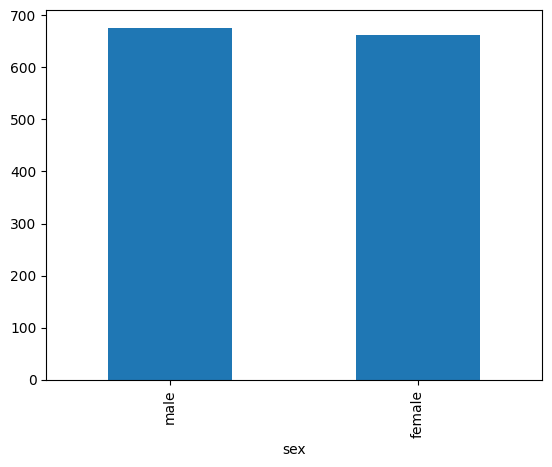

In [120]:
df['sex'].value_counts().plot(kind = 'bar')

In [121]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [122]:
df[df['sex'] == 'male'][['age', 'bmi','children']].agg(['min', 'mean', 'max'])

,age,bmi,children
min,18.00000,15.960000,0.000000
mean,38.91716,30.943129,1.115385
max,64.00000,53.130000,5.000000


In [123]:
df[df['sex'] == 'female'][['age', 'bmi','children']].agg(['min', 'mean', 'max'])

,age,bmi,children
min,18.000000,16.815000,0.000000
mean,39.503021,30.377749,1.074018
max,64.000000,48.070000,5.000000


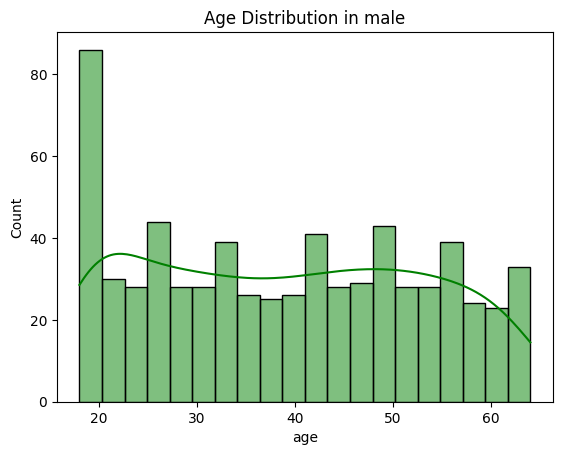

In [124]:
sns.histplot(df[df['sex'] == 'male']['age'], kde = True, bins = 20, color = 'g')
plt.title('Age Distribution in male')
plt.show()

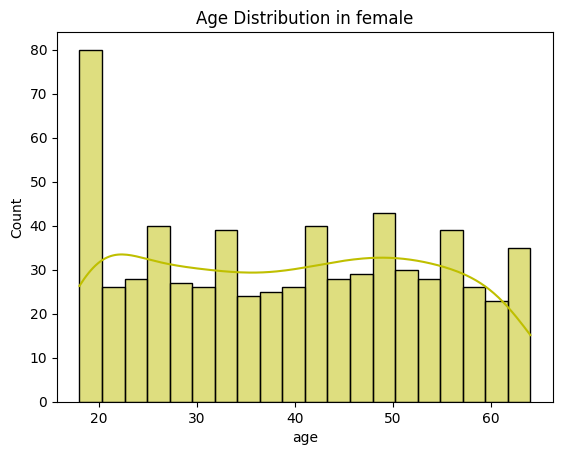

In [125]:
sns.histplot(df[df['sex'] == 'female']['age'], kde = True, bins = 20, color = 'y')
plt.title('Age Distribution in female')
plt.show()

Text(0.5, 1.0, 'Chidren for male')

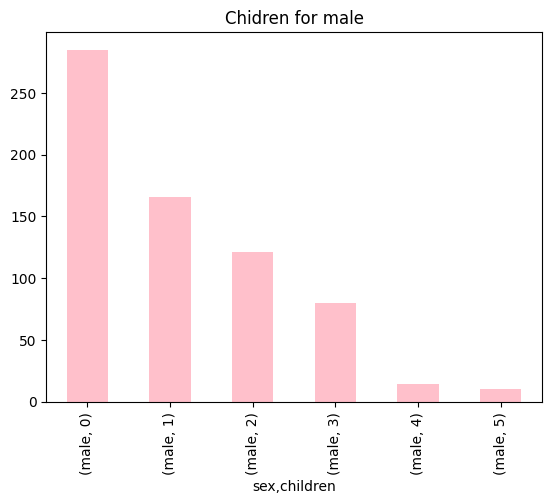

In [126]:
df[df['sex'] == 'male'].groupby('sex')['children'].value_counts().plot(kind = 'bar', color = 'pink')
plt.title('Chidren for male')

Text(0.5, 1.0, 'Children for female')

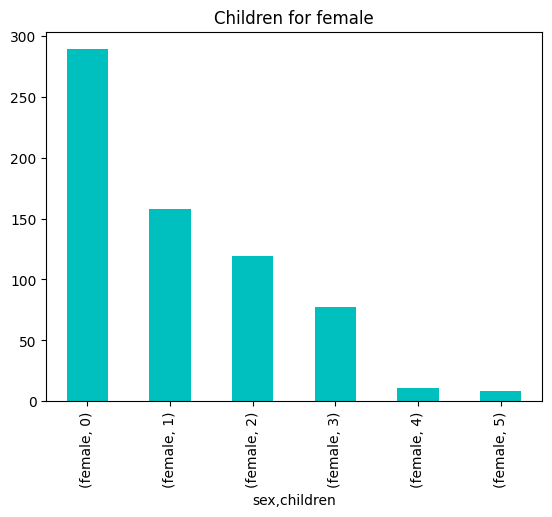

In [127]:
df[df['sex'] == 'female'].groupby('sex')['children'].value_counts().plot(kind = 'bar', color = 'c')
plt.title('Children for female')

Text(0.5, 1.0, 'No. of smokers in male')

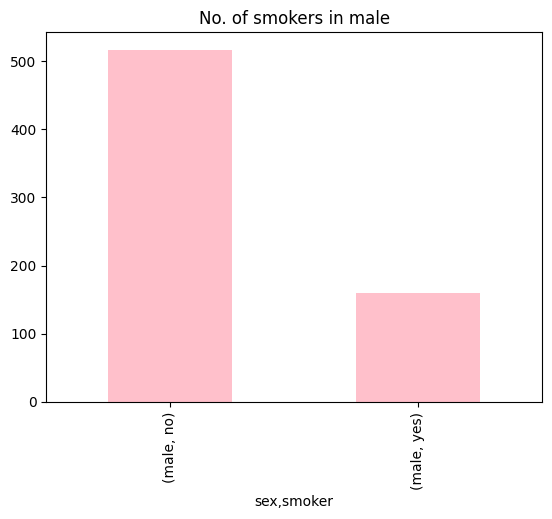

In [128]:
df[df['sex'] == 'male'].groupby('sex')['smoker'].value_counts().plot(kind = 'bar', color = 'pink')
plt.title('No. of smokers in male')

Text(0.5, 1.0, 'No. of smokers in female')

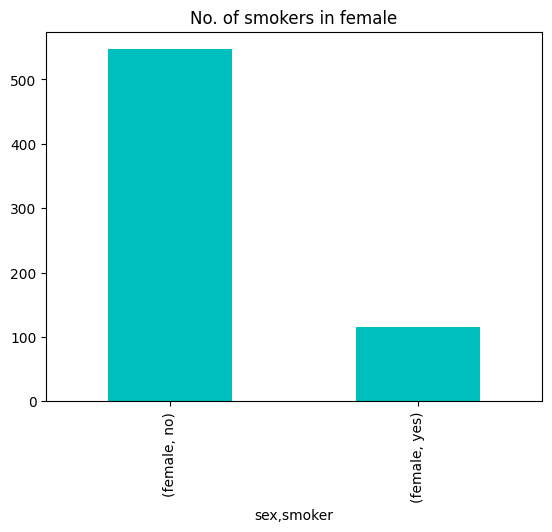

In [129]:
df[df['sex'] == 'female'].groupby('sex')['smoker'].value_counts().plot(kind = 'bar', color = 'c')
plt.title('No. of smokers in female')

Text(0.5, 1.0, 'Region wise distribution in male')

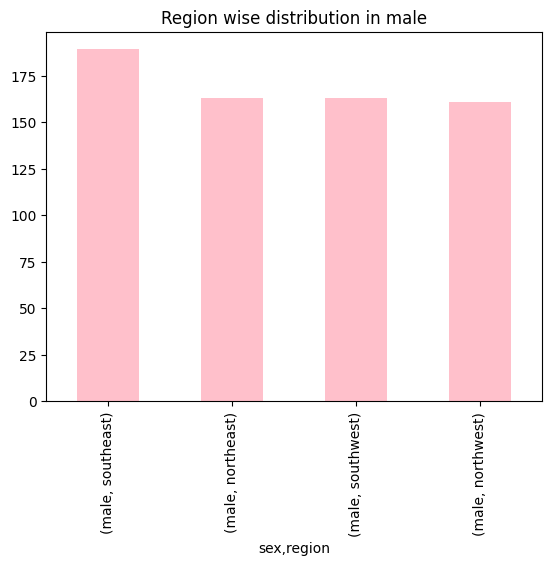

In [130]:
df[df['sex'] == 'male'].groupby('sex')['region'].value_counts().plot(kind = 'bar', color = 'pink')
plt.title('Region wise distribution in male')

Text(0.5, 1.0, 'Region wise distribution in female')

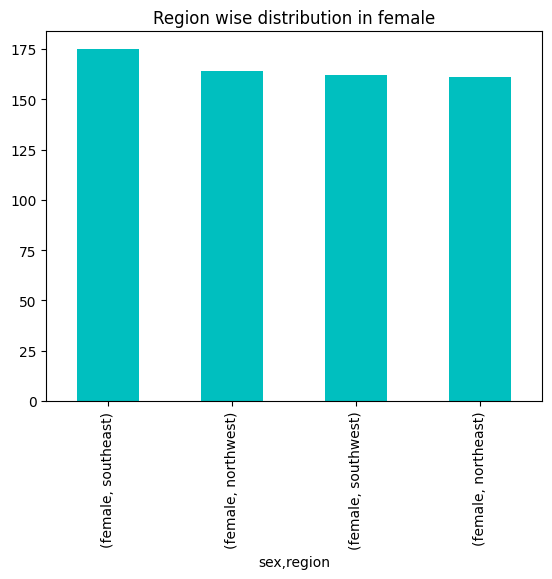

In [131]:
df[df['sex'] == 'female'].groupby('sex')['region'].value_counts().plot(kind = 'bar', color = 'c')
plt.title('Region wise distribution in female')

## Age

In [132]:
df['age'].describe().to_frame().drop('count')

,age
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


Text(0.5, 1.0, 'Age Distribution')

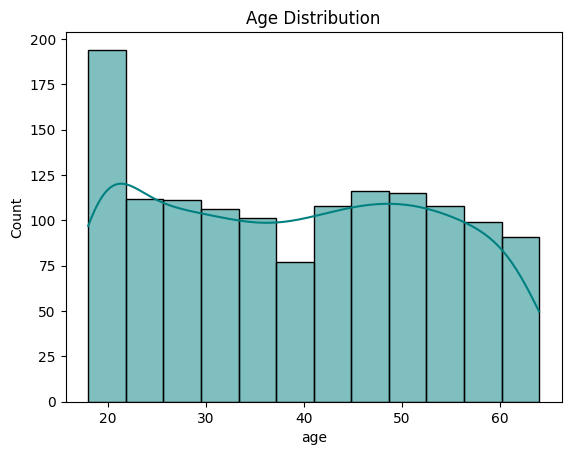

In [133]:
sns.histplot(df['age'], kde = True, color = 'teal')
plt.title('Age Distribution')

<Axes: xlabel='age', ylabel='bmi'>

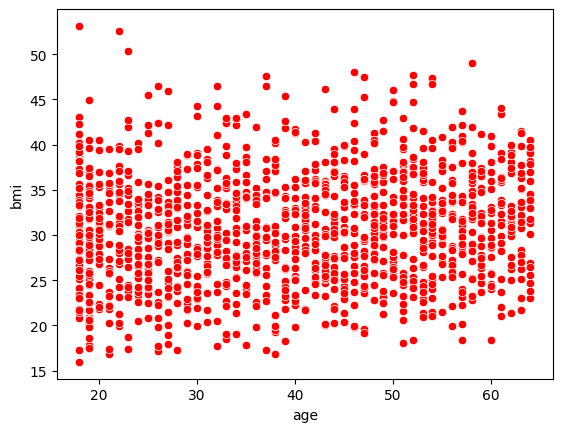

In [134]:
sns.scatterplot(x = df['age'], y = df['bmi'], data = df, color = 'r')

Text(0.5, 1.0, 'No. of children v/s average age')

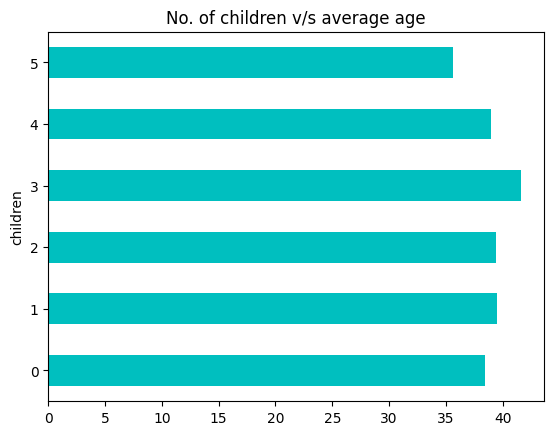

In [135]:
df.groupby('children')['age'].mean().plot(kind = 'barh', color = 'c')
plt.title('No. of children v/s average age')

## Children

Text(0.5, 1.0, 'No. of children')

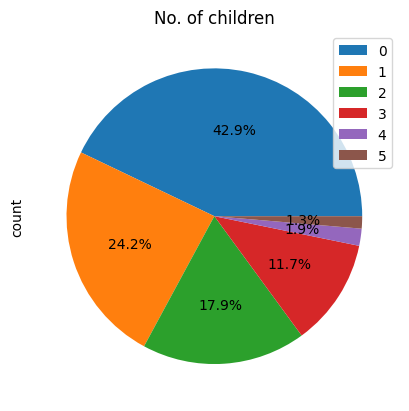

In [136]:
df['children'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', labels = None)
plt.legend(labels = df['children'].value_counts().index, loc = 'upper right')
plt.title('No. of children')

# Region

Text(0.5, 1.0, 'Region distribution')

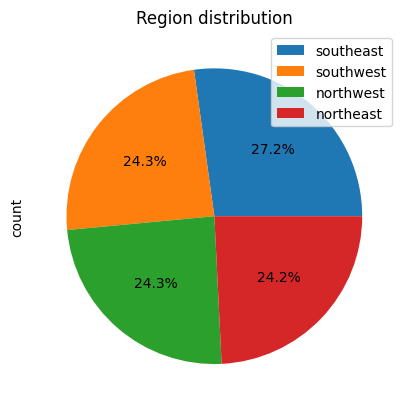

In [137]:
df['region'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', labels = None)
plt.legend(labels = df['region'].value_counts().index, loc = 'upper right')
plt.title('Region distribution')

#Charges

Text(0.5, 1.0, 'Charge distribution')

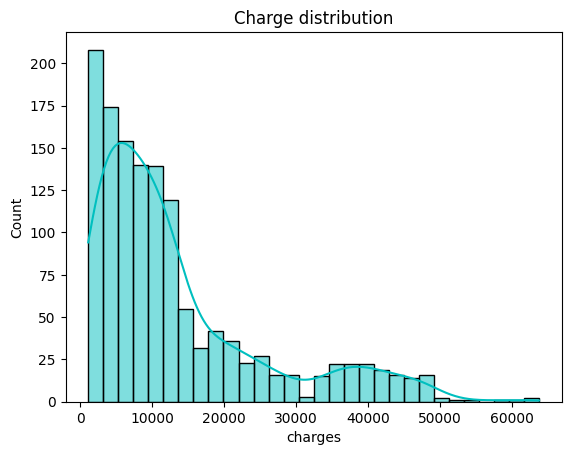

In [138]:
sns.histplot(df['charges'], kde = True, color = 'c')
plt.title('Charge distribution')

Text(0.5, 1.0, 'Charge distribution for log scaled data')

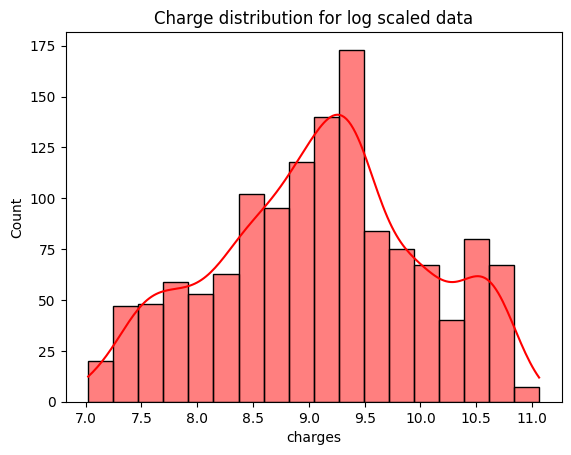

In [139]:
sns.histplot(np.log(df['charges']), kde = True, color = 'r')
plt.title('Charge distribution for log scaled data')

Text(0.5, 1.0, 'Mean Charges region wise')

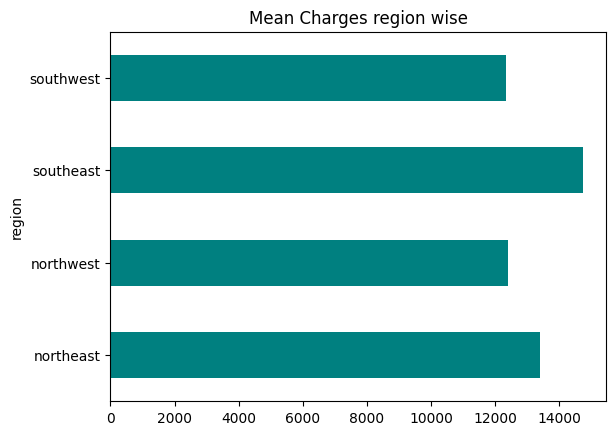

In [140]:
df.groupby('region')['charges'].mean().plot(kind = 'barh', color = 'teal')
plt.title('Mean Charges region wise')

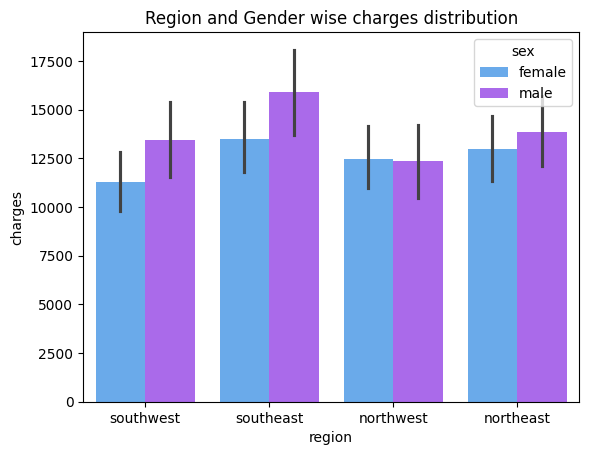

In [141]:
sns.barplot(x = 'region', y = 'charges', hue = 'sex', data = df, palette = 'cool')
plt.title('Region and Gender wise charges distribution')
plt.show()

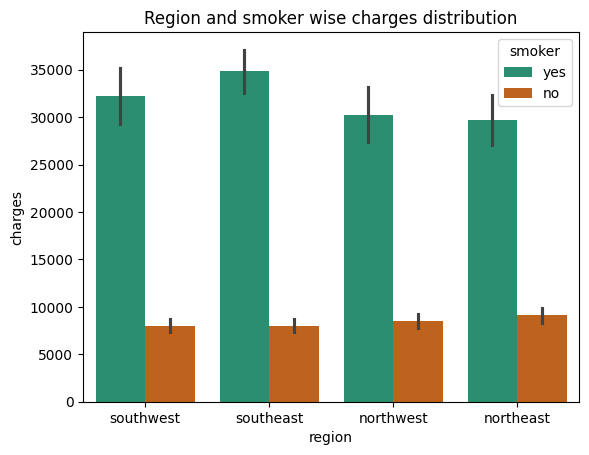

In [142]:
sns.barplot(x = 'region', y = 'charges', hue = 'smoker', data = df, palette = 'Dark2')
plt.title('Region and smoker wise charges distribution')
plt.show()

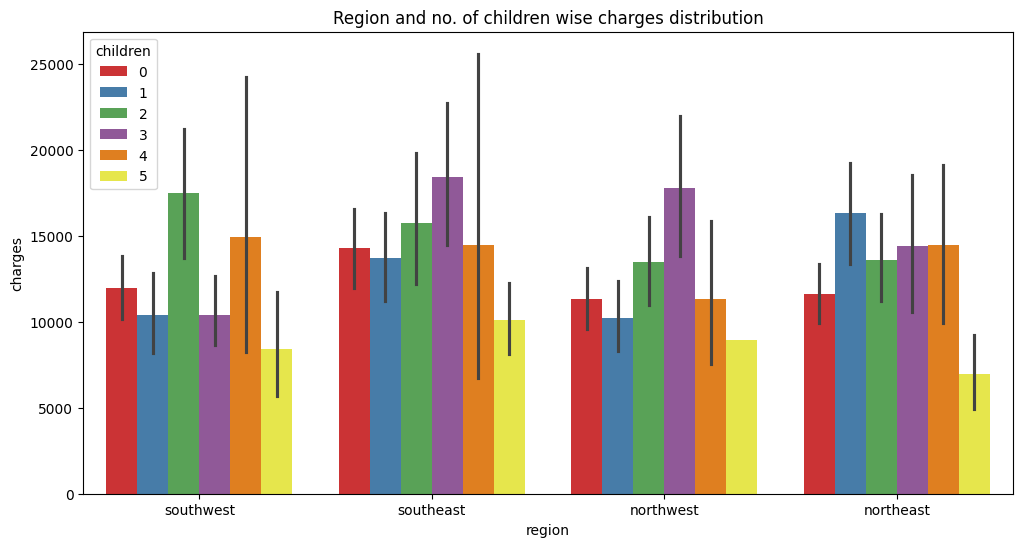

In [143]:
f, ax = plt.subplots(1,1, figsize = (12,6))
ax = sns.barplot(x = 'region', y = 'charges', hue = 'children', data = df, palette = 'Set1')
plt.title('Region and no. of children wise charges distribution')
plt.show()

## Encoding the categorical features

In [144]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## MOdel building

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [146]:
x = df.drop('charges' ,axis = 1)
y = df['charges']

In [147]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 4)

In [148]:
reg = LinearRegression()

In [149]:
reg.fit(x_train, y_train)

LinearRegression()

In [150]:
y_pred = reg.predict(x_test)

In [151]:
R2_score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
mae = np.mean(np.absolute(y_test-y_pred))

report = pd.DataFrame(data = {'R2 score': [R2_score], 'MSE': [mse], 'MAE': [mae]})
report

,R2 score,MSE,MAE
0,0.69701,3.907238e+07,4244.017563
